# Logistic Regression for Breast Cancer Prediction

The **Breast Cancer dataset** consists of **30 different variables** used to predict whether a tumor is **malignant** or **benign**.

## Logistic Regression Model

In logistic regression, we compute the probability that a sample belongs to the malignant class using the sigmoid function:

$p(x) = \frac{1}{1 + e^{-z}}$

- If \( p(x) > 0.5 \), the tumor is classified as **malignant**.
- Otherwise, it is classified as **benign**.

## Role of the Sigmoid Function

The function \( p(x) \) is the **sigmoid function**, which maps the **weighted contribution of all features** from the range \( [-\infty, \infty] \) to a probability in the range \( [0, 1] \).

## What is \( z \)?

The variable \( z \) is a **linear combination** of all the features that contribute to the classification:


$ z = a_1 \cdot x_1 + a_2 \cdot x_2 + \ldots + a_n \cdot x_n + b $


- $ ( a_1, a_2, \ldots, a_n )$ are the **weights** learned during training.
- \( x_1, x_2, \ldots, x_n \) are the **input features** (30 in total).
- \( b \) is the **bias term**.

This value of \( z \) determines how likely the input is to be classified as malignant or benign, with the sigmoid function translating it into a probability.

---



### importing libraries

In [21]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

### extracting dataframe

In [22]:
data = load_breast_cancer(as_frame =True)
df = pd.DataFrame(data.frame)
cancer = data.target
columns = data.data
features=columns.columns.tolist()
size = 455+114
train_size = 455
test_size = size - train_size
print(len(features))
print(features)


30
['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension']


### finding scaling requirements

In [23]:
m = np.zeros(30)
std = np.zeros(30)
for i ,a in enumerate(features):
    m[i]=np.mean(columns[a])
    std[i]= np.std(columns[a])

### splitting data into train and test

In [24]:
x= data.data
y = data.target
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=20)


###  scaling data


In [25]:
scaled_data = np.zeros((30,train_size ))
for i, f in enumerate(features):
    scaled_data[i]=np.array(x_train[f])

#scale
for i in range (0,30):
    scaled_data[i]= (scaled_data[i]-m[i])/std[i]
print(scaled_data.shape)   
co_eff_features = np.ones(31) # 30 number of features + 1 bias term
co_eff_features = np.clip(co_eff_features,1e-15,1-1e-15)


(30, 455)


In [26]:
test_data = np.zeros((30,test_size ))
for i, f in enumerate(features):
    test_data[i]=np.array(x_test[f])

#scale
for i in range (0,30):
    test_data[i]= (test_data[i]-m[i])/std[i]
print(test_data.shape)   


(30, 114)


### appending bias term in train and test data (bias =1)

In [27]:
b=np.ones((1,train_size))
scaled_data = np.concatenate((scaled_data,b),axis=0)
b=np.ones((1,test_size))
test_data = np.concatenate((test_data,b),axis=0)
print(scaled_data.shape)   
print(test_data.shape)  
print(b.shape) 


(31, 455)
(31, 114)
(1, 114)


### gradient descent derivative function

In [28]:
def der_loss(x_t,cf,y_t,train_size,s):
    z= np.dot(x_t,cf)
    p=1/(1+np.exp(-z))
    diff = y_t-p
    diff *=x_t[:,s]
    return np.average(diff) 

### gradient iteration

In [29]:
learn_rate = 0.1
print(type(scaled_data))
print(scaled_data.T.shape)
for j in range(0,1000):
    for i,f in enumerate(features):
        co_eff_features[i]=co_eff_features[i]+learn_rate*(der_loss(scaled_data.T,co_eff_features,y_train,train_size,i))
learn_rate = 0.01
for j in range(0,4000):
    for i,f in enumerate(features):
        co_eff_features[i]=co_eff_features[i]+learn_rate*(der_loss(scaled_data.T,co_eff_features,y_train,train_size,i))
learn_rate = 0.001
for j in range(0,5000):
    for i,f in enumerate(features):
        co_eff_features[i]=co_eff_features[i]+learn_rate*(der_loss(scaled_data.T,co_eff_features,y_train,train_size,i))


<class 'numpy.ndarray'>
(455, 31)


### predicting on test data
### finding accuracy

In [30]:
y_test_pred = np.dot(test_data.T,co_eff_features)
y_p = 1/(1+np.exp(-y_test_pred))
print(y_p.shape)
y_final = [1 if a>0.5 else 0 for a in y_test_pred]
for a,b in zip(y_test,y_final):
    print(f"{a} : {b}")
y_t_arr = np.array(y_test)
y_f_arr = np.array(y_final)
accuracy = y_t_arr ^ y_f_arr
accuracy_score = np.sum(accuracy)
print(accuracy_score)
accuracy_percentage = (test_size-accuracy_score)/test_size
accuracy_score*=100
print(accuracy_percentage)

(114,)
1 : 1
0 : 1
0 : 0
1 : 1
0 : 0
0 : 0
0 : 0
1 : 1
1 : 1
0 : 0
0 : 0
1 : 1
1 : 1
0 : 0
1 : 1
1 : 1
1 : 1
0 : 0
0 : 0
1 : 1
1 : 1
1 : 1
0 : 0
0 : 0
0 : 0
0 : 0
0 : 0
1 : 1
1 : 1
1 : 1
0 : 0
1 : 1
0 : 0
1 : 1
0 : 0
0 : 0
0 : 0
1 : 1
0 : 0
1 : 1
0 : 0
1 : 1
1 : 1
1 : 1
0 : 0
1 : 1
1 : 1
1 : 1
1 : 1
0 : 0
1 : 1
1 : 1
0 : 0
1 : 1
1 : 1
1 : 1
1 : 1
1 : 1
1 : 1
1 : 1
1 : 1
1 : 1
1 : 1
1 : 1
0 : 0
1 : 1
0 : 0
1 : 1
1 : 1
0 : 0
0 : 0
0 : 0
0 : 0
1 : 1
1 : 1
0 : 0
0 : 0
0 : 0
0 : 0
1 : 1
1 : 1
0 : 0
1 : 1
1 : 1
1 : 1
0 : 0
1 : 1
1 : 1
1 : 1
1 : 1
1 : 1
0 : 0
1 : 1
1 : 1
0 : 0
0 : 0
0 : 0
1 : 1
1 : 1
1 : 1
1 : 1
0 : 0
0 : 0
0 : 0
1 : 1
1 : 1
0 : 0
0 : 0
1 : 1
0 : 0
1 : 1
1 : 1
0 : 0
1 : 1
1
0.9912280701754386


In [31]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_final))


              precision    recall  f1-score   support

           0       1.00      0.98      0.99        48
           1       0.99      1.00      0.99        66

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



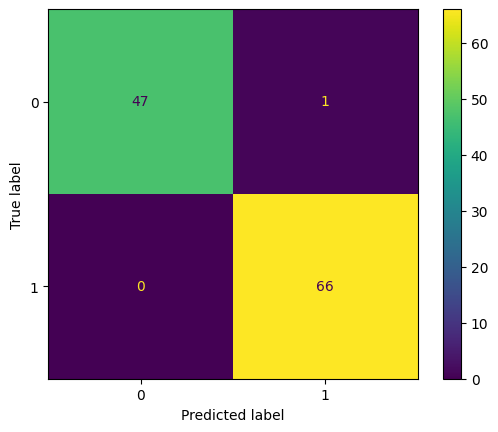

In [33]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_final)
ConfusionMatrixDisplay(cm).plot()
